In [1]:
import json
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error

2022-08-21 11:26:24.488072: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 11:26:24.488175: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
response = requests.get("https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=CAD&limit=1000")
# json.loads(response.content)['Data']

In [3]:
df = pd.DataFrame(json.loads(response.content)['Data'])

In [4]:
df.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1574640000,199.74,191.19,185.98,3500174.72,6.815155e+08,194.71,multiply,BTC
1,1574726400,198.25,193.68,194.71,2324338.15,4.559359e+08,196.16,multiply,BTC
2,1574812800,207.57,202.27,196.16,2654231.01,5.384714e+08,202.87,multiply,BTC
3,1574899200,204.69,199.80,202.87,2177473.91,4.411397e+08,202.59,multiply,BTC
4,1574985600,212.58,204.02,202.59,2323684.94,4.783989e+08,205.88,multiply,BTC


In [11]:
def train_test_split(df):
    split_row = len(df) - int(0.1 * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data
train, test = train_test_split(df)

In [12]:
# len(train)
# len(test)

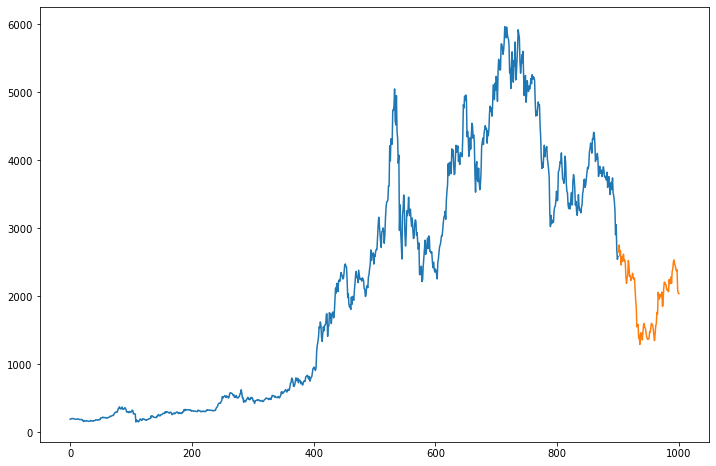

In [13]:
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.plot(train['close'], label='train_data')
ax.plot(test['close'], label='test_data')